In [1]:
import pandas as pd
df = pd.read_csv('C:/Users/kaleo/Downloads/Dataset/restaurant.csv')
df

Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730               Naml۱ Gurme           208         ��stanbul   
9547        5908749              Ceviz A��ac۱           208         ��stanbul   
9548        5915807                     Huqqa           208         ��stanbul   
9549        5916112               A���k Kahve           208         ��stanbul   
9550        5927402  Walter's Coffee Roastery           208         ��stanbul   

                                                Address  \
0     Third Floor, Century City Mall, Kalayaan Avenu...   
1     Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2     Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3     Third Floor, Mega Fashion Hall, SM Megamall, O...   
4     Third Floor, Mega Atrium, SM Megamall, Ortigas...   
...                                                 ...   
9546  Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...   
9547  Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...   
9548  Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...   
9549  Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...   
9550  Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, ...   

                                        Locality  \
0      Century City Mall, Poblacion, Makati City   
1     Little Tokyo, Legaspi Village, Makati City   
2     Edsa Shangri-La, Ortigas, Mandaluyong City   
3         SM Megamall, Ortigas, Mandaluyong City   
4         SM Megamall, Ortigas, Mandaluyong City   
...                                          ...   
9546                                    Karak�_y   
9547                                   Ko��uyolu   
9548                                 Kuru�_e��me   
9549                                 Kuru�_e��me   
9550                                        Moda   

                                       Locality Verbose   Longitude  \
0     Century City Mall, Poblacion, Makati City, Mak...  121.027535   
1     Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101   
2     Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831   
3     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475   
4     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508   
...                                                 ...         ...   
9546                                Karak�_y, ��stanbul   28.977392   
9547                               Ko��uyolu, ��stanbul   29.041297   
9548                             Kuru�_e��me, ��stanbul   29.034640   
9549                             Kuru�_e��me, ��stanbul   29.036019   
9550                                    Moda, ��stanbul   29.026016   

       Latitude                          Cuisines  ...          Currency  \
0     14.565443        French, Japanese, Desserts  ...  Botswana Pula(P)   
1     14.553708                          Japanese  ...  Botswana Pula(P)   
2     14.581404  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)   
3     14.585318                   Japanese, Sushi  ...  Botswana Pula(P)   
4     14.584450                  Japanese, Korean  ...  Botswana Pula(P)   
...         ...                               ...  ...               ...   
9546  41.022793                           Turkish  ...  Turkish Lira(TL)   
9547  41.009847   World Cuisine, Patisserie, Cafe  ...  Turkish Lira(TL)   
9548  41.055817            Italian, World Cuisine  ...  Turkish Lira(TL)   
9549  41.057979                   Restaurant Cafe  ...  Turkish Lira(TL)   
9550  40.9

In [8]:
print(df["Rating text"].unique())

['Excellent' 'Very Good' 'Good' 'Average' 'Not rated' 'Poor']


In [7]:
#Task: Restaurant Reviews Analyze the text reviews to identify the most common positive and negative keywords.
#Calculate the average length of reviews and explore if there is a relationship betweenreview length and rating.
df.groupby("Restaurant Name")["Rating text"].value_counts()

Restaurant Name       Rating text
#45                   Good           1
#Dilliwaala6          Good           1
#InstaFreeze          Not rated      1
#OFF Campus           Good           1
#Urban Caf��          Average        1
                                    ..
t Lounge by Dilmah    Good           1
tashas                Very Good      1
wagamama              Good           1
{Niche} - Cafe & Bar  Very Good      1
�ukura��a Sofras۱     Very Good      1
Name: count, Length: 8011, dtype: int64

In [11]:
positive_labels = ["Excellent", "Very Good", "Good"]
negative_labels = ["Average", "Poor", "Not rated"]

df["Sentiment"] = df["Rating text"].apply(
    lambda x: "Positive" if x in positive_labels else "Negative"
)
df["Sentiment"] 

0       Positive
1       Positive
2       Positive
3       Positive
4       Positive
          ...   
9546    Positive
9547    Positive
9548    Positive
9549    Positive
9550    Positive
Name: Sentiment, Length: 9551, dtype: object

In [ ]:
from collections import Counter
import nltk
from nltk.corpus import stopwords


nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

def extract_keywords(series, n=15):
    words = []
    for text in series.dropna():
        for word in str(text).lower().split(","):
            word = word.strip()
            if word not in stop_words and len(word) > 2:
                words.append(word)
    return Counter(words).most_common(n)


positive_keywords = extract_keywords(df[df["Sentiment"]=="Positive"]["Cuisines"])
negative_keywords = extract_keywords(df[df["Sentiment"]=="Negative"]["Cuisines"])

print("✅ Positive Keywords:\n", positive_keywords)
print("❌ Negative Keywords:\n", negative_keywords)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kaleo\AppData\Roaming\nltk_data...


✅ Positive Keywords:
 [('north indian', 1076), ('chinese', 772), ('italian', 550), ('fast food', 513), ('continental', 504), ('cafe', 429), ('desserts', 319), ('american', 288), ('mughlai', 270), ('bakery', 221), ('asian', 200), ('thai', 183), ('burger', 171), ('pizza', 157), ('seafood', 149)]
❌ Negative Keywords:
 [('north indian', 2884), ('chinese', 1963), ('fast food', 1473), ('mughlai', 725), ('bakery', 524), ('south indian', 489), ('street food', 414), ('desserts', 334), ('mithai', 321), ('cafe', 274), ('continental', 232), ('pizza', 224), ('italian', 214), ('ice cream', 149), ('beverages', 131)]


[nltk_data]   Unzipping corpora\stopwords.zip.


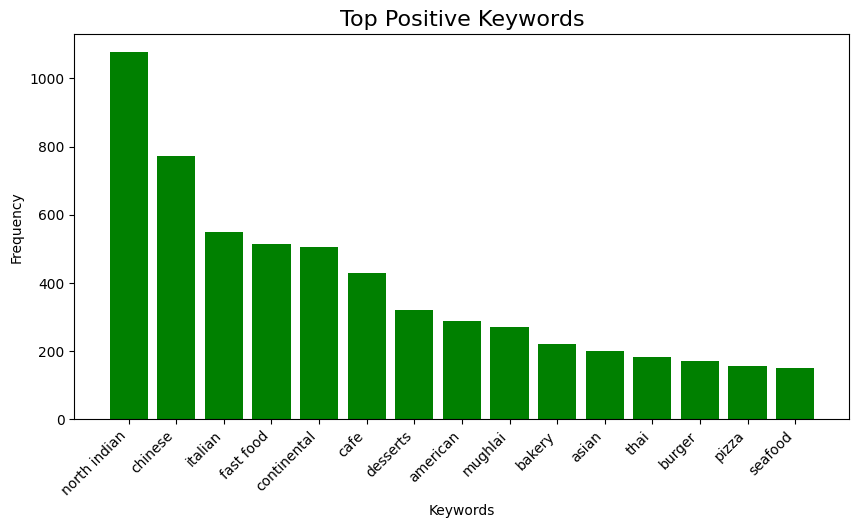

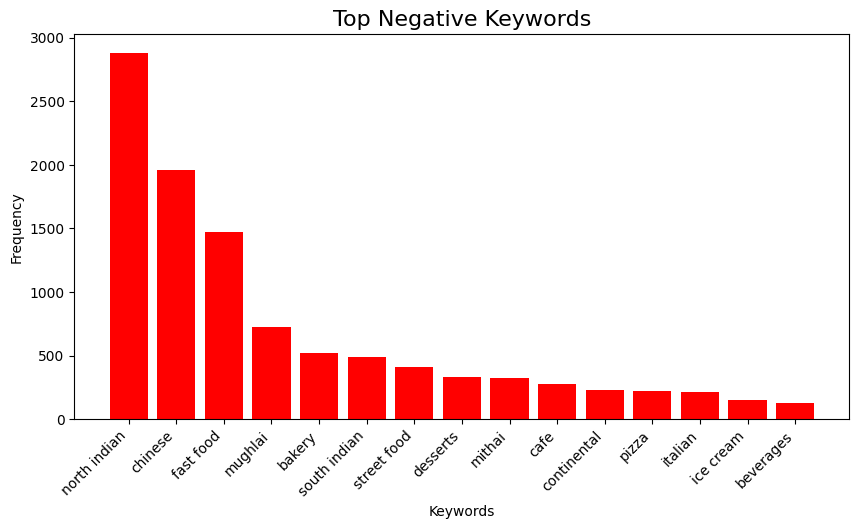

In [14]:
import matplotlib.pyplot as plt

def plot_bar(keywords, title, color):
    words, counts = zip(*keywords)  # split into two lists
    plt.figure(figsize=(10,5))
    plt.bar(words, counts, color=color)
    plt.xticks(rotation=45, ha="right")
    plt.title(title, fontsize=16)
    plt.xlabel("Keywords")
    plt.ylabel("Frequency")
    plt.show()

plot_bar(positive_keywords, "Top Positive Keywords", "green")
plot_bar(negative_keywords, "Top Negative Keywords", "red")
